## Decision Tree Classification Model - Pima Indians Diabetes Data

We will use the built in Pima Indians Diabetes dataset. It is available as part of the SKlearn datasets. We have made it easily available for you.

In [1]:
import pandas as pd

# load dataset
diabetes_data = pd.read_csv("/content/diabetes.csv",)
# Factor the variable 'Outcome' (convert to categorical data)
diabetes_data['Outcome'] = pd.Categorical(diabetes_data['Outcome'])


In [2]:
display(diabetes_data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']

In [12]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

seed = 1
# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=seed,max_leaf_nodes=11)

# Fit the model to the training data
dt_classifier.fit(X, y)

# Predict on the test data
y_pred = dt_classifier.predict(X)

# Calculate accuracy on the test data (You can use other metrics as well)
accuracy = accuracy_score(y, y_pred)

# Calculate misclassification error
misclassification_error = 1 - accuracy

print("Misclassification Error:", misclassification_error)


Misclassification Error: 0.1875


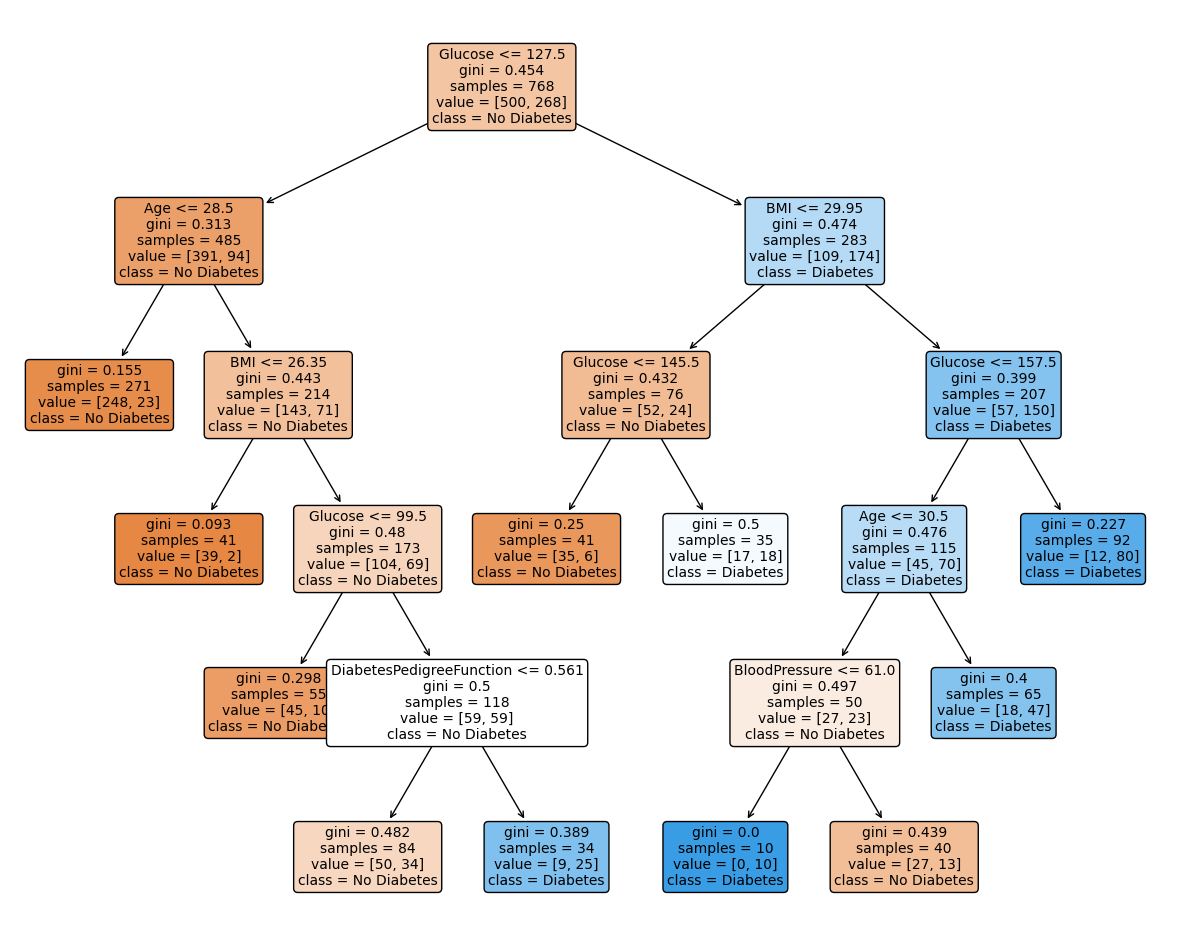

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True, fontsize=10)
plt.show()

In [14]:
from sklearn.model_selection import LeaveOneOut
# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# List to store predicted target values for each iteration
y_pred_loocv = []

# Perform Leave-One-Out Cross-Validation
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Create a new decision tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=seed,max_leaf_nodes=11)

    # Fit the model on the current training set
    dt_classifier.fit(X_train, y_train)

    # Predict the target value using the test set
    y_pred = dt_classifier.predict(X_test)

    # Store the predicted target value for the current test sample
    y_pred_loocv.append(y_pred[0])

# Calculate accuracy for LOOCV
accuracy_loocv = accuracy_score(y, y_pred_loocv)

# Calculate misclassification error for LOOCV
misclassification_error_loocv = 1 - accuracy_loocv

print("Leave-One-Out Cross-Validation Misclassification Error:", misclassification_error_loocv)


Leave-One-Out Cross-Validation Misclassification Error: 0.23307291666666663


In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation and get the deviance scores for each size
cv_scores = []
for size in range(2, X.shape[1] + 1):
    dt_classifier.set_params(max_leaf_nodes=size)  # Prune the tree with max_leaf_nodes=size
    scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

# Find the best-pruned tree size
best_pruned = np.argmin(cv_scores) + 2  # Adding 2 to the index because the range started from 2

print("Best Pruned Tree Size:", best_pruned)

Best Pruned Tree Size: 2


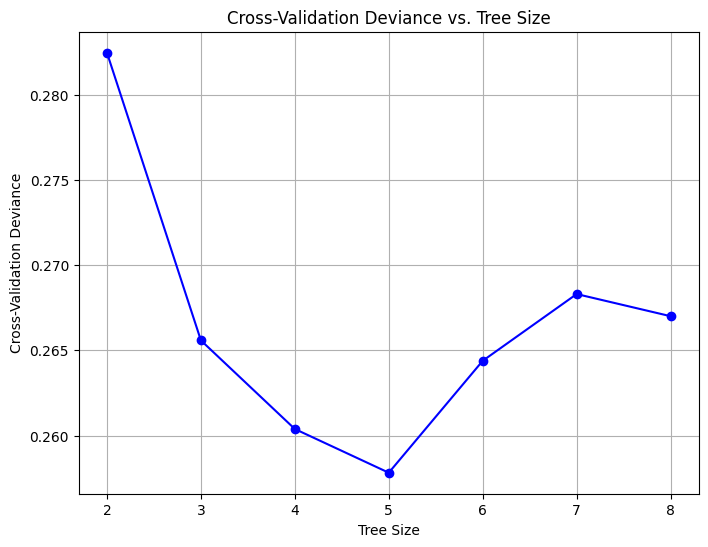

In [16]:
cv_sizes = []
cv_devs = []
for size in range(2, X.shape[1] + 1):
    dt_classifier.set_params(max_leaf_nodes=size)  # Prune the tree with max_leaf_nodes=size
    scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='neg_mean_squared_error')
    mean_dev = -scores.mean()  # Calculate the mean of the negative mean squared error (negate again to get positive)
    cv_sizes.append(size)
    cv_devs.append(mean_dev)

# Plot the cross-validation deviance against tree size
plt.figure(figsize=(8, 6))
plt.plot(cv_sizes, cv_devs, 'bo-')
plt.xlabel('Tree Size')
plt.ylabel('Cross-Validation Deviance')
plt.title('Cross-Validation Deviance vs. Tree Size')
plt.grid(True)
plt.show()

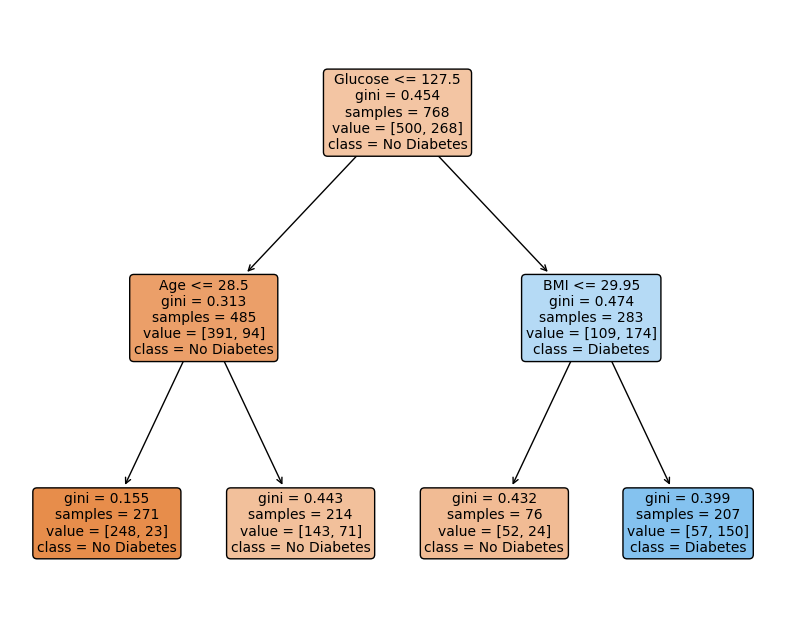

In [17]:
# Prune the tree to obtain the best-pruned tree with max_leaf_nodes = 4
dt_pruned = DecisionTreeClassifier(max_leaf_nodes=4, random_state=seed)
dt_pruned.fit(X, y)

# Plot the best-pruned tree
plt.figure(figsize=(10, 8))
plot_tree(dt_pruned, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True, fontsize=10)
plt.show()


In [18]:

def LOOCV_pruned(data):
    n = len(data)
    tree_pred_fit_pruned = []
    for i in range(n):
        newdata = data.drop(index=i)
        testdata = data.loc[[i]]

        # Create a new decision tree classifier
        dt_classifier = DecisionTreeClassifier(random_state=seed)

        # Fit the model on the current training set
        dt_classifier.fit(newdata.drop(columns=['Outcome']), newdata['Outcome'])

        # Prune the tree to obtain the best-pruned tree with max_leaf_nodes = 4
        dt_pruned = DecisionTreeClassifier(max_leaf_nodes=4, random_state=seed)
        dt_pruned.fit(newdata.drop(columns=['Outcome']), newdata['Outcome'])

        # Predict the target value using the test set
        y_pred = dt_pruned.predict(testdata.drop(columns=['Outcome']))

        # Store the predicted target value for the current test sample
        tree_pred_fit_pruned.append(y_pred[0])

    MSE = 1 - accuracy_score(data['Outcome'], tree_pred_fit_pruned)
    return {'MSE': MSE, 'tree_pred_fit_pruned': tree_pred_fit_pruned}

# Perform LOOCV for the pruned tree and get the tree predictions
test_MSE_pruned = LOOCV_pruned(data=diabetes_data)
tree_pred_fit_pruned = test_MSE_pruned['tree_pred_fit_pruned']

# Calculate the table
table_result_pruned = pd.crosstab(index=pd.Series(tree_pred_fit_pruned), columns=diabetes_data['Outcome'])
print(table_result_pruned)
misclassification_error_loocv= (118+57)/768
print("Leave-One-Out Cross-Validation Misclassification Error:", misclassification_error_loocv)

Outcome    0    1
row_0            
0        443  118
1         57  150
Leave-One-Out Cross-Validation Misclassification Error: 0.22786458333333334


,Feature,Importance
1,Glucose,0.324609
5,BMI,0.170129
6,DiabetesPedigreeFunction,0.128213
7,Age,0.122720
2,BloodPressure,0.085992
0,Pregnancies,0.067067
4,Insulin,0.052483
3,SkinThickness,0.048788


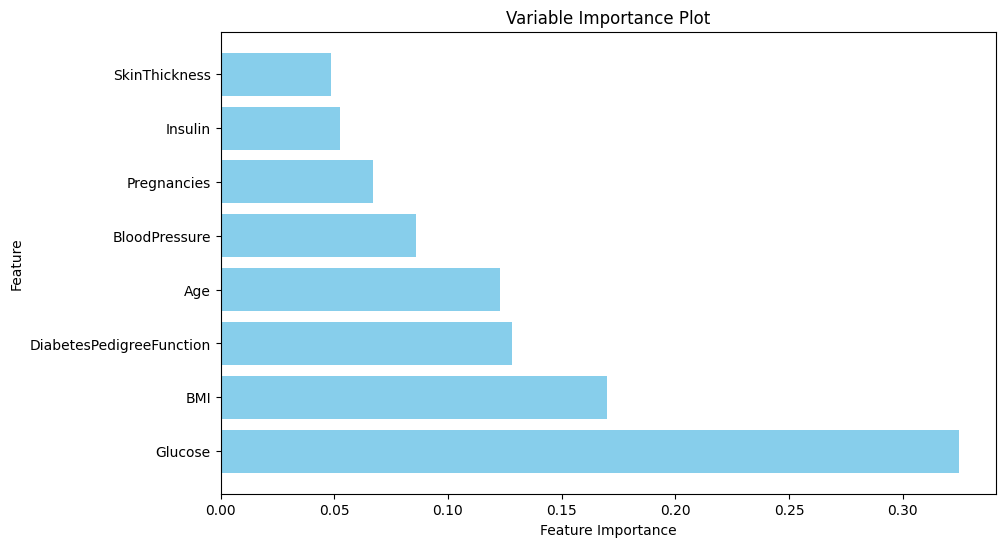

In [19]:
from sklearn.ensemble import RandomForestClassifier
# Create the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, max_features=8, random_state=seed)

# Fit the model to the data
rf_classifier.fit(X, y)

# Get the feature importance scores
importance_scores = rf_classifier.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

display(importance_df)

# Plot the variable importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Variable Importance Plot')
plt.show()

**Bagging**

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
# Create a BaggingClassifier object with 15 base decision tree classifiers
bag = BaggingClassifier(n_estimators=15, random_state=seed)

# Train the BaggingClassifier on the training data
bag.fit(X, y)

# Make predictions on the test dataset
predictions = bag.predict(X)

# Get the predicted probabilities for each class for the test dataset
predicted_probas = bag.predict_proba(X)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9921875


In [35]:
def LOOCV_bagging(data):
    loo = LeaveOneOut()
    n = len(data)
    correct_predictions = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create a BaggingClassifier with 15 base decision tree classifiers
        bag = BaggingClassifier(n_estimators=15, random_state=seed)

        # Train the BaggingClassifier on the training data
        bag.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = bag.predict(X_test)

        # Check if the prediction is correct and update the count
        if y_pred[0] == y_test.iloc[0]:
            correct_predictions += 1

    # Calculate the misclassification error rate
    misclassification_error_rate = 1 - (correct_predictions / n)
    return misclassification_error_rate

# Perform LOOCV for bagging and calculate the misclassification error rate
misclassification_error_rate = LOOCV_bagging(data=diabetes_data)
print("Misclassification Error Rate:", misclassification_error_rate)

Misclassification Error Rate: 0.23177083333333337


**Random Forest**


In [40]:
from xgboost import plot_importance
rf_classifier = RandomForestClassifier(n_estimators=1000, max_features=round(X.shape[0]/3), random_state=seed)

# Fit the model to the data
rf_classifier.fit(X, y)

# Get the feature importance scores
importance_scores = rf_classifier.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

                    Feature  Importance
1                   Glucose    0.324609
5                       BMI    0.170129
6  DiabetesPedigreeFunction    0.128213
7                       Age    0.122720
2             BloodPressure    0.085992
0               Pregnancies    0.067067
4                   Insulin    0.052483
3             SkinThickness    0.048788


<Figure size 1000x600 with 0 Axes>

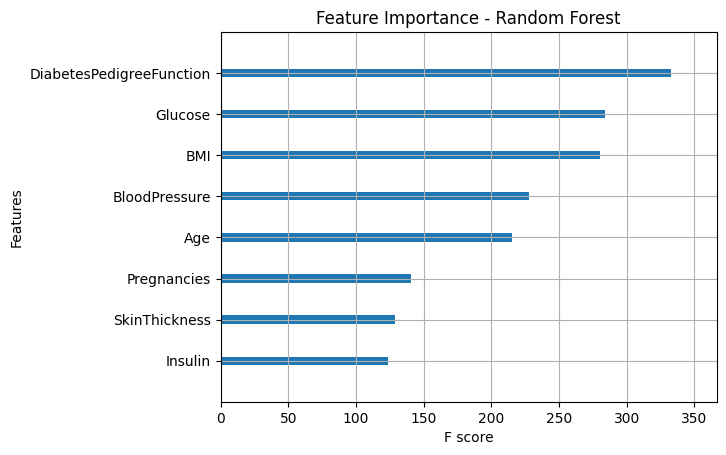

In [41]:
# Convert the Random Forest model to an XGBoost format
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, y)

# Create the feature importance plot using plot_importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', show_values=False)
plt.title('Feature Importance - Random Forest')
plt.show()

In [43]:

def LOOCV_random_forest(data):
    loo = LeaveOneOut()
    n = len(data)
    correct_predictions = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create a RandomForestClassifier with mtry=7/3 and ntree=1000
        rf_classifier = RandomForestClassifier(n_estimators=1000, max_features=round(X.shape[0]/3), random_state=seed)

        # Fit the model on the training data
        rf_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = rf_classifier.predict(X_test)

        # Check if the prediction is correct and update the count
        if y_pred[0] == y_test.iloc[0]:
            correct_predictions += 1

    # Calculate the misclassification rate
    misclassification_rate = 1 - (correct_predictions / n)
    return misclassification_rate

# Perform LOOCV and calculate the misclassification rate
misclassification_rate = LOOCV_random_forest(data=diabetes_data)
print("Misclassification Rate:", misclassification_rate)

Misclassification Rate: 0.23307291666666663


ADABoost

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Create a decision tree classifier with max_depth=1
dt_classifier = DecisionTreeClassifier(max_depth=1, random_state=seed)

# Create the AdaBoost classifier with 1000 estimators (trees)
boost_classifier = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=1000, random_state=seed)

# Fit the model to the data
boost_classifier.fit(X, y)

# Make predictions on the data
predictions = boost_classifier.predict(X)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, predictions)
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[[485  15]
 [ 33 235]]


In [56]:
import warnings

# Filter out the specific warning message
warnings.filterwarnings("ignore", message="`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.", category=FutureWarning)




def LOOCV1e(data):
    loo = LeaveOneOut()
    n = len(data)
    correct_predictions = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create a decision tree classifier with max_depth=1 as the base estimator for AdaBoost
        dt_classifier = DecisionTreeClassifier(max_depth=1, random_state=seed)

        # Create the AdaBoost classifier with 1000 estimators (trees)
        boost_classifier = AdaBoostClassifier(base_estimator=dt_classifier, n_estimators=1000, random_state=seed)

        # Fit the model on the training data
        boost_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = boost_classifier.predict(X_test)

        # Check if the prediction is correct and update the count
        if y_pred[0] == y_test.iloc[0]:
            correct_predictions += 1

    # Calculate the misclassification error rate
    misclassification_rate = 1 - (correct_predictions / n)
    return misclassification_rate

# Perform LOOCV and calculate the misclassification error rate
misclassification_rate = LOOCV1e(data=diabetes_data)
print("Misclassification Error Rate:", misclassification_rate)


Misclassification Error Rate: 0.28255208333333337


In [57]:
# Sample data for the table
test_error_rate = {
    'Method': ["un-pruned tree" , "pruned tree" , " bagging" ,"random-forest" ,"boosting"],
    'Miss classification error rate': [0.29818,0.22786, 0.23177,  0.23307, 0.28255],
}

# Create a DataFrame from the data dictionary
df_error = pd.DataFrame(test_error_rate)

# Display the DataFrame (table)
display(df_error)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Method,Miss classification error rate
0,un-pruned tree,0.29818
1,pruned tree,0.22786
2,bagging,0.23177
3,random-forest,0.23307
4,boosting,0.28255
